In [162]:
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import math 
sns.set()

In [163]:
Car_MPG = pd.read_csv('car.csv')

In [164]:
Car_MPG.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [165]:
Car_MPG.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


#since in our data set some values are zero which is also above the 90%, we can drop this column
#US Made column is not very necessary for the overall calculation, 
#since we will be dealing with MPG and around dimensions of it

In [166]:
Car_MPG = Car_MPG.drop(['US Made'], axis= 1)


In [167]:
Car_MPG

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


In [168]:
#checking the info for the data after the removal of a Column "US Made"
Car_MPG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [169]:
#We see that horsepower column is perceived as object data type by Pandas, 
##whereas we should be expecting a floating value. It means there is a string somewhereg 
Car_MPG.Horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [170]:
#replacing the missing values in horsepower column '?' with NaN 

Car_MPG.Horsepower = Car_MPG.Horsepower.str.replace('?','NaN').astype(float)

/var/folders/pw/tx8z9wfx7dqdcm_qzf1fh4dm0000gn/T/ipykernel_30029/3428016261.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Car_MPG.Horsepower = Car_MPG.Horsepower.str.replace('?','NaN').astype(float)


In [171]:
#now filling the missing data with the mean values

Car_MPG.Horsepower.fillna(Car_MPG.Horsepower.mean(),inplace=True)

#making changes to the data type
Car_MPG.Horsepower = Car_MPG.Horsepower.astype(int)

Car_MPG.info()

                                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    int64  
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [172]:
#checking the summary of the data set 
display(Car_MPG.describe())

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


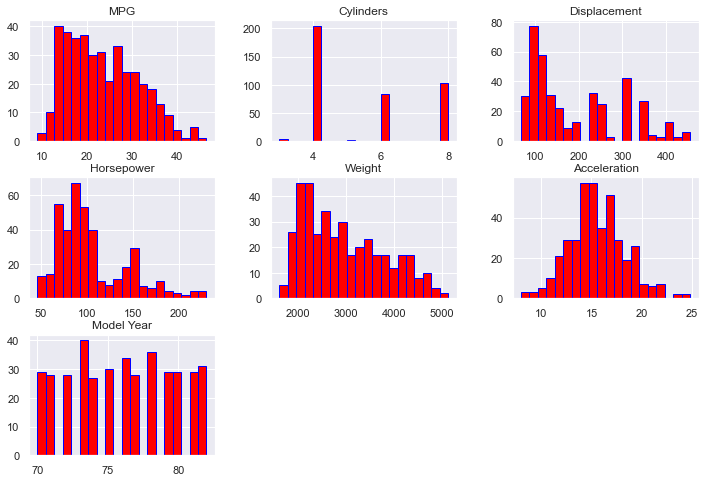

In [177]:
#checking distribution of the feature of cars 

Car_MPG.hist(figsize=(12,8),facecolor='red',edgecolor='blue',bins=20)
plt.show()

Now checking the Mileage Per Gallon and hence the other features

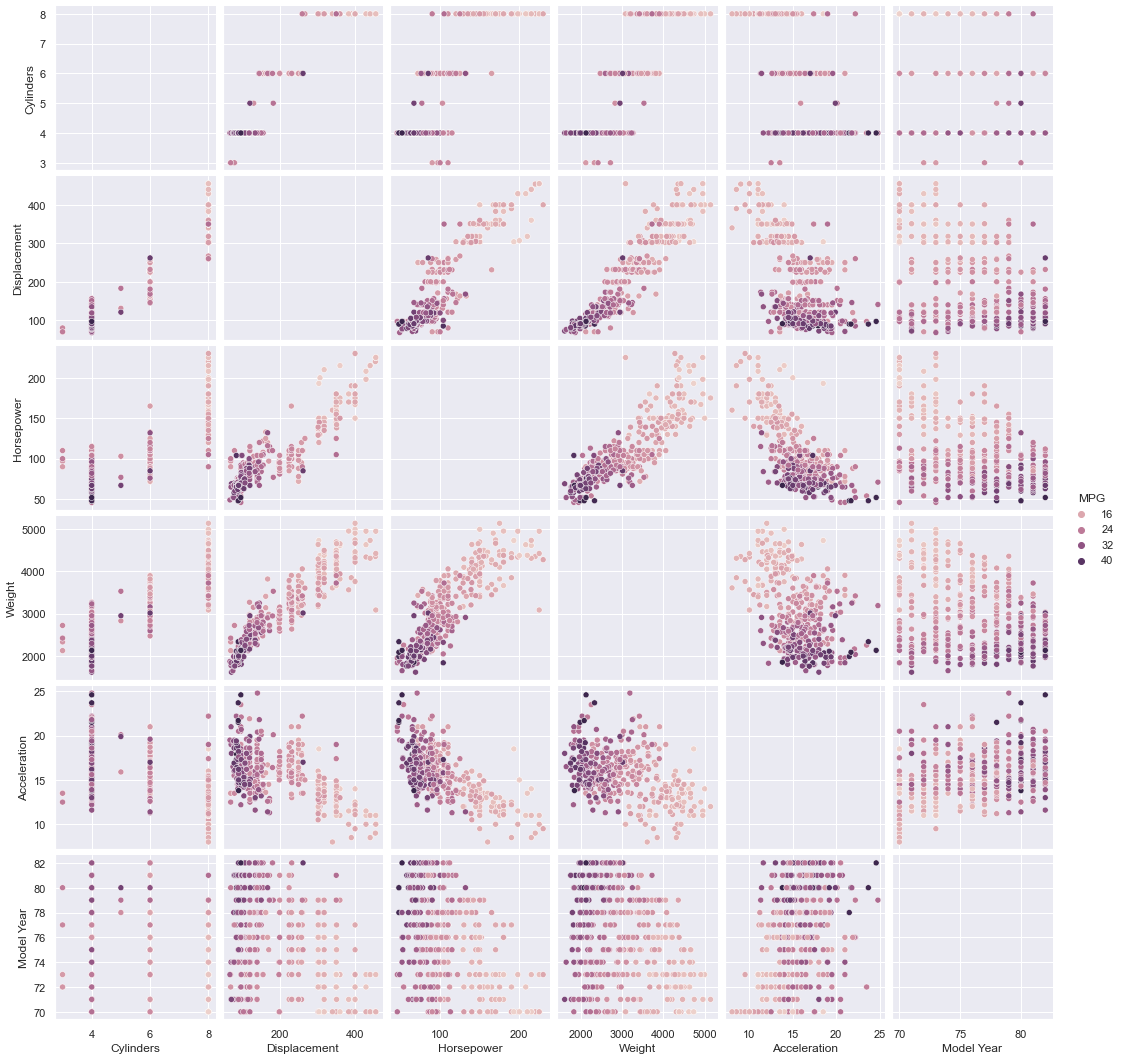

In [174]:
sns.pairplot(Car_MPG,  hue="MPG", diag_kind="MPG")

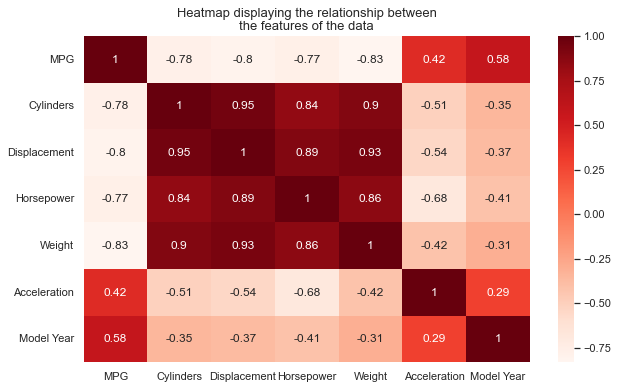

In [187]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and....
#.... the other features.

plt.figure(figsize=(10,6))
sns.heatmap(Car_MPG.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()


In [188]:
# MPG will be dependent variable, we will pick horsepower, weight and origin as independent variable

import statsmodels.formula.api as smf
formula = 'MPG ~ Horsepower + Weight + Cylinders + Displacement'
model = smf.ols(formula, data=Car_MPG)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          8.51e-103
Time:                        19:21:12   Log-Likelihood:                -1139.6
No. Observations:                 398   AIC:                             2289.
Df Residuals:                     393   BIC:                             2309.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.7437      1.528     29.932      0.000      42.739      48.748
Horsepower      -0.0385      0.013     -3.027      0.003      -0.064      -0.013
Weight          -0.0054      0.001     -7.534      0.000      -0.007      -0.004
Cylinders       -0.3577      0.409     -0.874      0.382      -1.162       0.447
Displacement    -0.0013      0.009     -0.146      0.884      -0.019       0.016
==============================================================================
Omnibus:                       38.249   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.224
Skew:                           0.705   Prob(JB):                     7.53e-12
Kurtosis:                       4.049   Cond. No.                     2.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model has R-Squared value 0.705, means 70.5% of the variance in our dependent variable(mpg) can be explained by this model.

Based on the coefficient values, we can construct the regression equation:

mpg = 45.7437 - 0.0385 horsepower - -0.0054 weight - -0.3577 cylinders - 0.0013 Displacement 

This reads:

1. Horsepower increase by 1, mpg will decrease by 0.0385
2. Weight increase by 1 pound, mgp will decrease by 0.3577

In [204]:
X= Car_MPG[ ['Cylinders', 'Acceleration','Model Year']]

y= Car_MPG.iloc[:,0].values

In [205]:
mi = mutual_info_regression(X, y)

<AxesSubplot:>

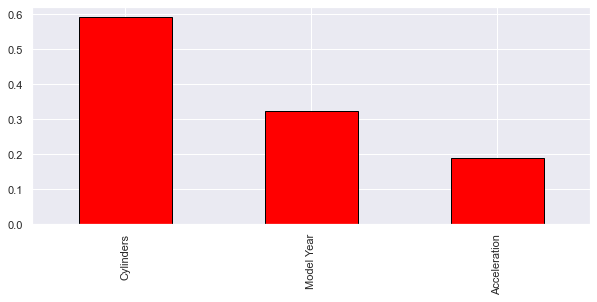

In [209]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4),facecolor='red',edgecolor='black')

We now have our feature importance to predict the miles per gallon. 
Miles per gallon can be predicted based on the number of cylinders in the car, 
the year car was manufactured ad the acceleration.
